In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
#prameters setting
#lng = 0.02 + 0.02*epsilon + nu
#M = 0.99*g^(-gamma)
#M = 0.99*exp(b_0*(1-g))
epsilon_num = int(1e4)
pre_nu_num = int(1e4)

dis_val = np.log(0.6)
nor_val = 0
dis_probability = 0.02

consumption_growth_intercept = 0.02
consumption_growth_slope = 0.02

#ε (epsilon)
df_consumption_growth = pd.DataFrame(np.random.randn(epsilon_num),columns=["epsilon"])

lst_pre_nu = list(np.random.rand(pre_nu_num))

lst_nu = list(map(lambda x: dis_val if x < dis_probability else nor_val, lst_pre_nu))

df_consumption_growth1 = df_consumption_growth.copy()
df_consumption_growth1["nu"] = lst_nu
df_consumption_growth1

#lng = 0.02 + 0.02*epsilon + nu
df_consumption_growth2 = df_consumption_growth1.copy()
df_consumption_growth2["lng"] = (consumption_growth_intercept 
                                 +
                                 consumption_growth_slope*df_consumption_growth2["epsilon"] 
                                 + 
                                 df_consumption_growth2["nu"]
                                )

df_consumption_growth3 = df_consumption_growth2.copy()
df_consumption_growth3["g"] = np.exp(df_consumption_growth3["lng"])

#parameters settings
gamma_start = 0
gamma_end = 4.1
gamma_increment = 0.1

M_coefficient = 0.99

#M = 0.99*g^(-gamma)
lst_cols = []

df_consumption_growth4 = df_consumption_growth3.copy()

for gamma in np.arange(gamma_start,gamma_end, gamma_increment):
    col = "M_" + str(round(gamma,1))
    lst_cols.append(col)
    df_consumption_growth4[col] = M_coefficient*np.exp((1-df_consumption_growth4["g"])*(gamma))
    
df_M = df_consumption_growth4[lst_cols].apply(lambda x: [np.mean(x), np.std(x), np.std(x)/np.mean(x)]).T
df_M.columns = ["mu_M", "xigma_M", "xigma_M/mu_M"]
df_M

,mu_M,xigma_M,xigma_M/mu_M
M_0.0,0.990000,1.713074e-13,1.730378e-13
M_0.1,0.988852,6.198524e-03,6.268406e-03
M_0.2,0.987743,1.260288e-02,1.275927e-02
M_0.3,0.986677,1.922218e-02,1.948174e-02
M_0.4,0.985652,2.606585e-02,2.644528e-02
M_0.5,0.984672,3.314373e-02,3.365965e-02
M_0.6,0.983738,4.046599e-02,4.113495e-02
M_0.7,0.982850,4.804323e-02,4.888157e-02
M_0.8,0.982010,5.588645e-02,5.691025e-02
M_0.9,0.981221,6.400707e-02,6.523208e-02


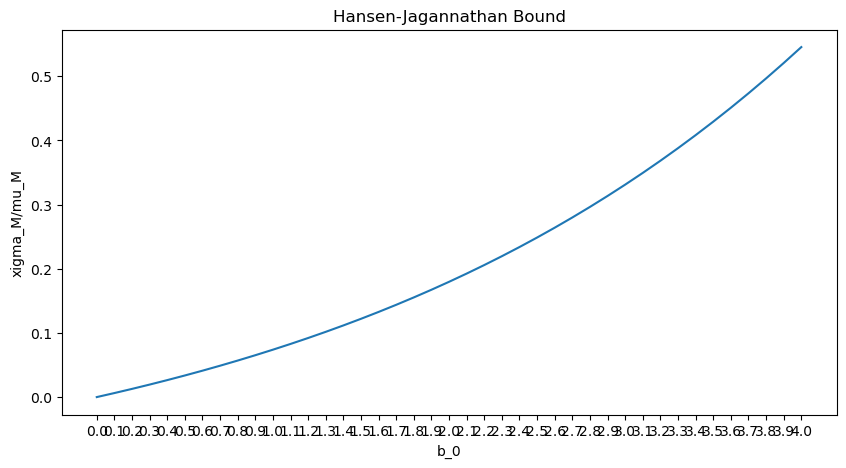

In [8]:
df_M1 = df_M.copy()
df_M1["gamma"] = [round(gamma, 1) for gamma in np.arange(gamma_start, gamma_end, gamma_increment)] 

plt.figure(figsize=[10,5])
plt.plot(df_M1["gamma"], df_M1["xigma_M/mu_M"])
plt.xticks(np.arange(gamma_start,gamma_end,gamma_increment))

plt.xlabel("b_0")
plt.ylabel("xigma_M/mu_M")
plt.title("Hansen-Jagannathan Bound")

plt.show()

# Explain (in words) how to find the smallest value of b0 for which the Hansen–Jagannathan bound is satisfied, and report the result for your data set.

>need to know sharpe ratio first, and let say sharp ratio = 0.4, then find samllest b0 that make xigma_M/mu_M larger than sharpe ratio

In [10]:
smallest_gamma = np.min(df_M1[df_M1["xigma_M/mu_M"]>0.4]["gamma"])
print(smallest_gamma)

3.4
